In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import cv2
import os 
import glob

In [ ]:
# from keras.datasets import mnist

# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# print(type(X_train))

In [ ]:
# batch_size = 16000 #number of images
# num_classes = 2 #only 2 types of classifications
# epochs = 12 

In [ ]:
# #input image dimensions
# img_rows, img_cols = 142, 163 


In [ ]:
# img = Image.open('cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png') 
# img

In [2]:
from matplotlib import pyplot as plt


In [3]:
uninfected_images = []
uninfected_labels = []
for file in glob.glob("cell_images/Uninfected/*.png"):
    file = cv2.imread(file)
    file = cv2.resize(file, (100,100))
    uninfected_images.append(file)
    uninfected_labels.append(0)
print(len(uninfected_images))

13779


In [4]:
infected_images = []
infected_labels = []
for file in glob.glob("cell_images/Parasitized/*.png"):
    file = cv2.imread(file)
    file = cv2.resize(file, (100,100))
    infected_images.append(file)
    infected_labels.append(1)
print(len(infected_images))

13779


In [5]:
print(type(uninfected_images[0]))

<class 'numpy.ndarray'>


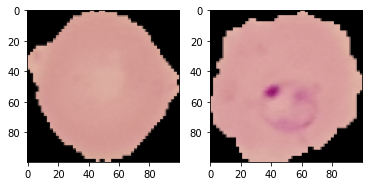

In [6]:
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(uninfected_images[0], cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(infected_images[0], cv2.COLOR_BGR2RGB))
# plt.subplot(1, 2, 1), plt.imshow(uninfected_images[0], 'gray')
# plt.subplot(1, 2, 2), plt.imshow(infected_images[0], 'gray')
plt.show()

In [ ]:
# for image in uninfected_images:
#     image = cv2.resize(image, (64,64))
# for image in infected_images:
#     image = cv2.resize(image, (64,64))


(<matplotlib.axes._subplots.AxesSubplot at 0x18aca37b730>,
 <matplotlib.image.AxesImage at 0x18ae62283a0>)

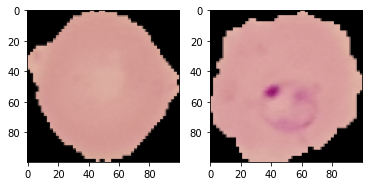

In [7]:
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(uninfected_images[0], cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(infected_images[0], cv2.COLOR_BGR2RGB))

In [8]:
print(type(uninfected_images[0]))

<class 'numpy.ndarray'>


In [9]:
#join our lists together
images = uninfected_images + infected_images
labels = uninfected_labels + infected_labels

In [10]:
from sklearn.model_selection import train_test_split

image_train, image_test, label_train, label_test = train_test_split(images, labels, test_size = 0.33)

18463 9095 18463 9095
1
1


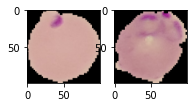

In [11]:
print(len(image_train), len(image_test), len(label_train), len(label_test))
plt.subplot(1, 4, 1), plt.imshow(cv2.cvtColor(image_train[0], cv2.COLOR_BGR2RGB))
plt.subplot(1, 4, 2), plt.imshow(cv2.cvtColor(image_test[0], cv2.COLOR_BGR2RGB))
print(label_train[0])
print(label_test[0])


In [12]:
print(np.array(image_train).shape)
print(image_train[0])

(18463, 100, 100, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [13]:
import datetime
image_train = np.array(image_train)
image_test = np.array(image_test)
label_train = np.array(label_train)
label_test = np.array(label_test)

In [14]:
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from keras.layers import MaxPooling2D

from keras.models import Sequential
from keras import optimizers


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(100, 100, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(image_train, label_train, batch_size=128, epochs=10, )

In [ ]:
model.summary()

In [15]:
classifier = Sequential()
classifier.add(Convolution2D(50, (3, 3), input_shape = (100, 100, 3), activation = 'relu',padding='same'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=1))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 50)      1400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 50)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 50)        200       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        14432     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        1

In [ ]:
history = classifier.fit(np.array(image_train), 
                         label_train, 
                         batch_size = 64, 
                         epochs = 5)

Epoch 1/5
 47/289 [===>..........................] - ETA: 11:35 - loss: 0.7393 - accuracy: 0.6459

In [ ]:
results = history.evaluate(image_test,label_test, batch_size = 128)
print(results)